In [85]:
import numpy as np
import pandas as pd


In [86]:
df = pd.read_csv('spam.csv',encoding="windows-1252") 

In [87]:
df.sample(10)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5016,spam,Dear 0776xxxxxxx U've been invited to XCHAT. T...,NaN,NaN,NaN
1049,spam,18 days to Euro2004 kickoff! U will be kept in...,NaN,NaN,NaN
1091,ham,Please da call me any mistake from my side sor...,NaN,NaN,NaN
1845,ham,Hi. || Do u want | to join me with sts later? ...,NaN,NaN,NaN
389,ham,Yup having my lunch buffet now.. U eat already?,NaN,NaN,NaN
4732,ham,Good Morning my Dear Shijutta........... Have ...,NaN,NaN,NaN
1408,ham,"I've got ten bucks, jay is being noncomittal",NaN,NaN,NaN
4919,ham,"G says you never answer your texts, confirm/deny",NaN,NaN,NaN
285,ham,"K, I might come by tonight then if my class le...",NaN,NaN,NaN
2620,ham,How come?,NaN,NaN,NaN


In [88]:
df.shape

(5572, 5)

In [89]:
# 1.Data Cleaning -> removing NaN values
#2. EDA->Exploratory Data Analysis
#It means exploring the data deeply before modeling — finding patterns, spotting mistakes, understanding relationships,
#and deciding what cleaning or preprocessing is needed.
#3.text preprocessing ->vectorization,removing stopwords ,stemming
#4.Model Building
#5. Evaluating Model and changes if req


# 1. DATA CLEANING

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [91]:
# as last 3 columns have very less value of no use , drop them
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True) 
#permanent operation so inplace true

In [92]:
df.sample(10)

,v1,v2
4304,ham,Yo come over carlos will be here soon
4808,ham,"Don't worry though, I understand how important..."
2892,ham,K I'll be sure to get up before noon and see w...
1869,ham,Mom wants to know where you at
3130,spam,LookAtMe!: Thanks for your purchase of a video...
2196,ham,"Not much, just some textin'. How bout you?"
608,ham,Neva mind it's ok..
3290,ham,I'm not smoking while people use \wylie smokes...
3024,ham,"What part of \don't initiate\"" don't you under..."
4642,ham,Sorry i din lock my keypad.


In [93]:
#renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(10)

,target,text
1533,ham,Horrible bf... I now v hungry...
800,spam,Last Chance! Claim ur å£150 worth of discount ...
5501,spam,PRIVATE! Your 2003 Account Statement for 07808...
4756,ham,"hey, looks like I was wrong and one of the kap..."
1986,ham,S..antha num corrct dane
4009,spam,Wan2 win a Meet+Greet with Westlife 4 U or a m...
5224,ham,\OH FUCK. JUSWOKE UP IN A BED ON A BOATIN THE ...
2056,ham,.Please charge my mobile when you get up in mo...
311,spam,Think ur smart ? Win å£200 this week in our we...
2462,ham,"Rose needs water, season needs change, poet ne..."


In [94]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [95]:
df['target']= encoder.fit_transform(df['target'])
#spam as 1 not spam as 0


In [96]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [97]:
#check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

#check for duplicate values
df.duplicated().sum()

In [98]:
#remove duplicate
df = df.drop_duplicates(keep='first')

In [99]:
df.duplicated().sum()

0

In [100]:
df.shape

(5169, 2)

# 2. EDA


In [101]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [102]:
# no of not-spam and spam
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

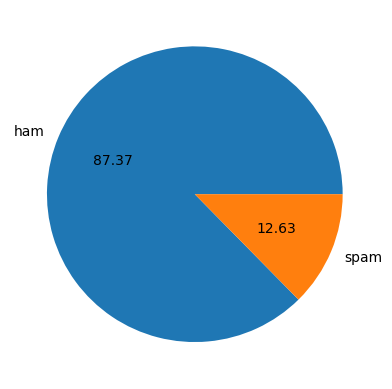

In [103]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [104]:
#data is imbalanced as ham is more than spam


In [105]:
import nltk

In [106]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [107]:
df['num_characters'] = df['text'].apply(len)

In [108]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [109]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [110]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [111]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [112]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [113]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [114]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [115]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [116]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

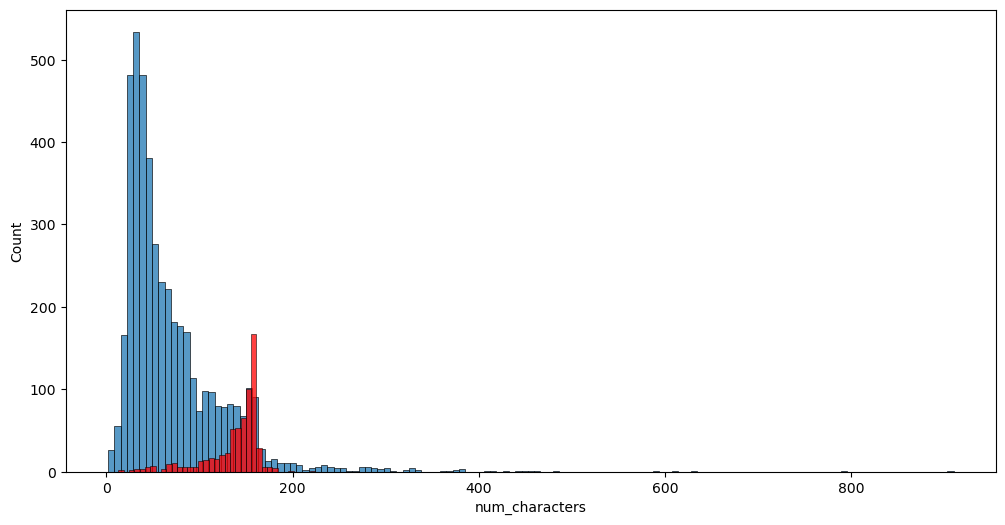

In [117]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

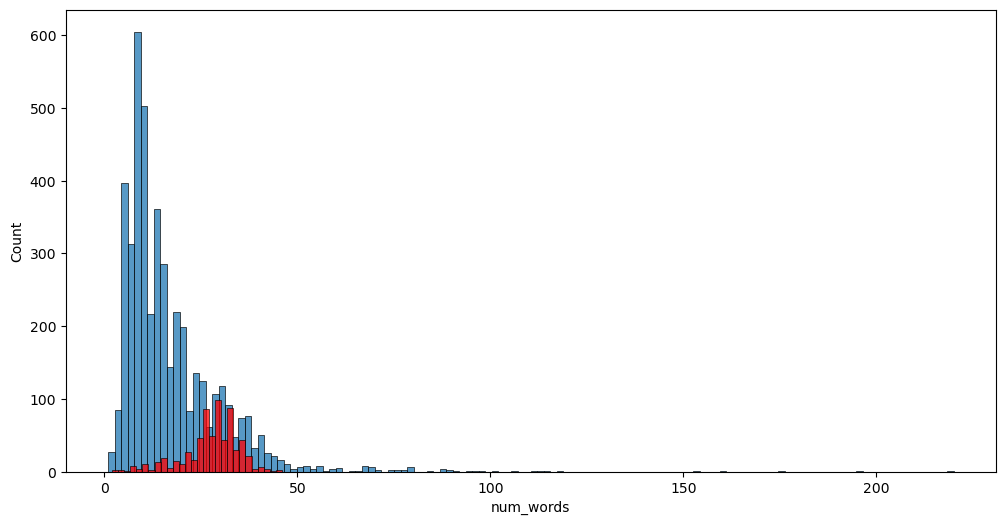

In [118]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

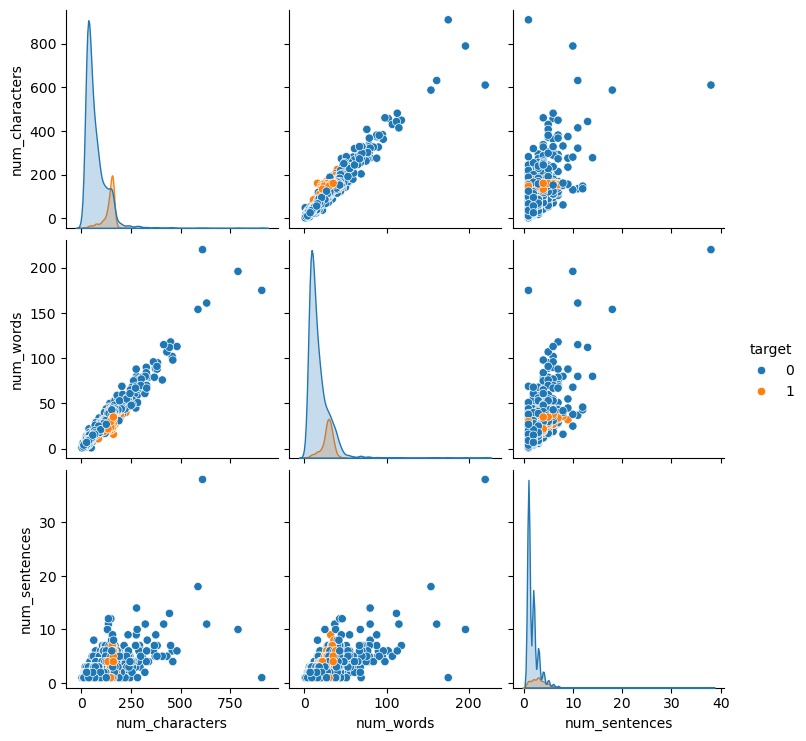

In [119]:
sns.pairplot(df,hue='target')

# 3. Data Preprocessing
    . Lower Case
    . Tokenization
    . Removing special Characters
    . Removing Stop words and punctuation
    . stemming
    

In [120]:
#Lowercasing: Converts all characters to lowercase to maintain consistency.
#Tokenization: Splits the text into individual words.
#Filtering: Removes non-alphanumeric tokens and common stopwords.
#Stemming: Reduces words to their root form. -> dance,dancing,danced all converted to dance as all mean same

In [121]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

ps = PorterStemmer()

def transform_text(text):        #Hi how Are you
    text = text.lower()            # hi how are you
    text = nltk.word_tokenize(text)  #['hi','how ','are','you']
    
    y = []
    for i in text:
        if i.isalnum():  #remove special char
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:  #stopwords have no meaning in sentence just help to form sentence
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [122]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [123]:
df['transformed_text'] = df['text'].apply(transform_text)

In [124]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [125]:
!pip install WordCloud
from wordcloud import WordCloud
wc = WordCloud(width=350,height=350,min_font_size=10,background_color='white')

In [126]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")) #extract  string and concat by space

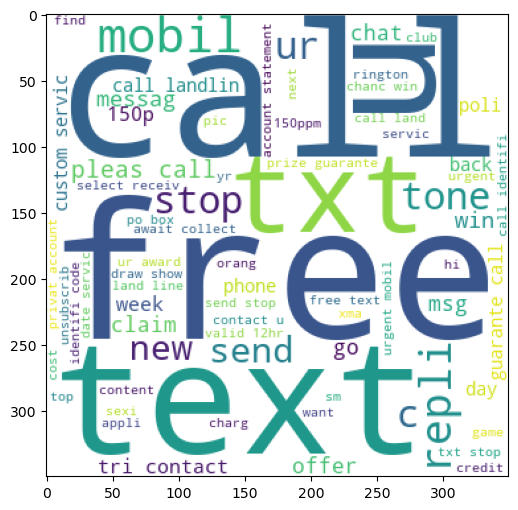

In [127]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [128]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

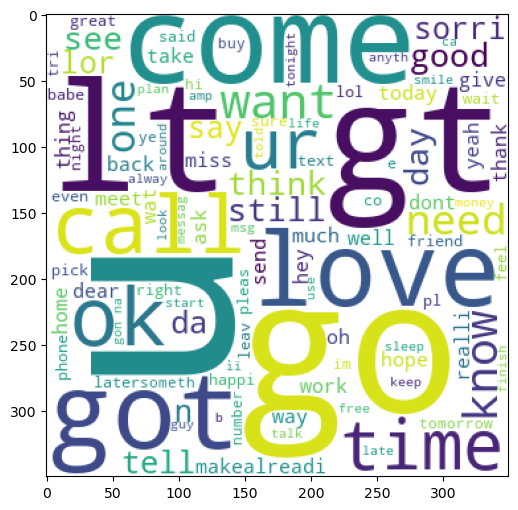

In [130]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [131]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [132]:
#top n(30) words of spam:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [133]:
len(spam_corpus)

9939

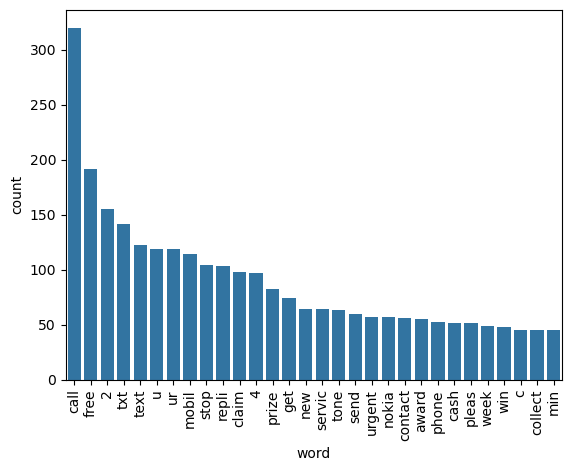

In [134]:

from collections import Counter
# Create DataFrame of most common 30 words
top_words = pd.DataFrame(Counter(spam_corpus).most_common(30))
top_words.columns = ['word', 'count']  # Rename columns for clarity

# Plot using seaborn
sns.barplot(x='word', y='count', data=top_words)
plt.xticks(rotation='vertical')
plt.show()

In [135]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [136]:
len(ham_corpus)

35404

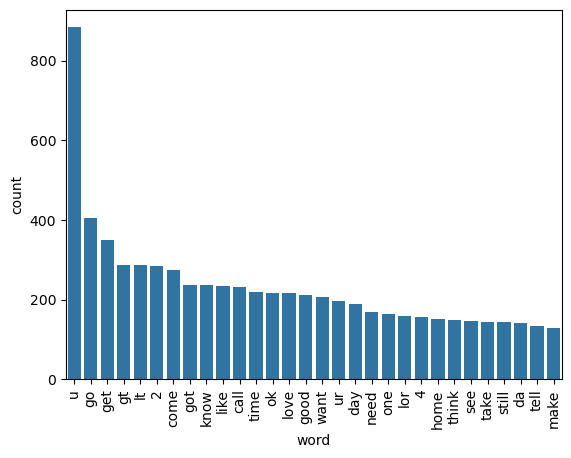

In [137]:
from collections import Counter
# Create DataFrame of most common 30 words
top_words = pd.DataFrame(Counter(ham_corpus).most_common(30))
top_words.columns = ['word', 'count']  # Rename columns for clarity

# Plot using seaborn
sns.barplot(x='word', y='count', data=top_words)
plt.xticks(rotation='vertical')
plt.show()

In [138]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Buliding


In [139]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [140]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [141]:
X.shape

(5169, 3000)

In [142]:
y = df['target'].values

In [143]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [146]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
#accuracy:ratio of correctly predicted messages out of total messages.
#confusion matrix:TN (True Negative): Model said "Not Spam", and it was indeed not spam.
#TP (True Positive): Model said "Spam", and it was indeed spam.
#FP (False Positive): Model said "Spam", but it was actually not spam. (⚠️ dangerous!)
#FN (False Negative): Model said "Not Spam", but it was actually spam. (⚠️ also bad!)
#Precision is: Of all the messages predicted as spam, how many were actually spam?

In [147]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [148]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))  #How many predicted spam messages were actually spam?

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [149]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [150]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [151]:
# tfidf --> MNB  it is best as precision is 1 best among all so it is selected

In [153]:
import pickle

# Save the fitted TF-IDF vectorizer
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))

# Save the trained Multinomial Naive Bayes model
pickle.dump(mnb, open('model.pkl', 'wb'))
